In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

Update the B_pollution and C_subsidy

$\quad \epsilon_{t,p} \times \frac{Congestion\, Charge}{Cost\, of\, Driving} $

$= 0.5 \times \frac{14}{17.8\times 1.55} $

$= 0.2537$



$\quad \epsilon_{ts,tvol} \times \Delta \%traffic \times time\, cost $

$= 0.1471 \times 0.2537 \times 817\textrm{million} $

$= 304 \textrm{million per year} $


$time\,cost =1434000\times 260 \times \frac{40}{60} \times 32.86=\textrm{8 billion}$



$\quad \frac{1}{3} \times 304 \textrm{million per year} $

$= 102 \textrm{million per year} $

### CO_2

$\quad Emission\,per\,mile^{[1]} \times Reduction\, in\,Milelage\times Cost^{[2]}$

$ = 0.411 \times \textrm{102 million}\times 0.033 $

$= \textrm{23 million per year}$


### NO_x
$\quad Emission\,per\,mile^{[3]} \times Reduction\, in\,Milelage\times Cost^{}[2] $

$=0.00007 \times   \textrm{102 million}\times 0.081 $

$= \textrm{0.01 million per year} $


$ Reduction\, in\, Mileage = 0.2537\times1434000\times17.8\times 260=\textrm{168 million}$ 

### Accidents
$\quad\epsilon_{ta,tvol} \times \Delta \%traffic \times cost $

$= 0.1513 \times 0.2537 \times \textrm{4290 million}$

$= \textrm{164 million per year}$

### Operational cost

$\quad \textrm{38.9 million}^{[1]} \times 1.24^{[2]} \times 3.998^{[3]}$

$=\textrm{193 million per year}$


### Investment COst
$\quad  \textrm{200 million}^{[1]} \times1.32^{[2]}\times 1.619^{[3]}$

$=\textrm{427 million}$

$\quad \frac{263,635}{753,406}\times 100\%$

$=35.125\%$

$\quad \textrm{48.9 million}^{[1]}\times \frac{50\%}{35.125\%}$

$=\textrm{95 million}$

In [4]:
def run_cba(dis_rate = 0.05, charge = 14, elas = 0.5,avg_dis=17.8,cost_drive = 1.55, time_cost =32.86):
    
    # determine the percentage change in traffic flow with respect to price
    delta_traffic = elas *charge/(avg_dis*cost_drive) #default set as 0.5*14/(17.8 * 1.55) =0.2537
    delta_mil = delta_traffic * 717000 * 17.8 *260 *2

    # determine the common ratio for perpetual calculation (discount rate)
    cm = 1/(1+dis_rate)
    
    # determine the annual cost and benefit in million
    B_timesaving  = (0.1471 * delta_traffic) * (717000* 260*2) *(4/6)*time_cost  /1000000
    B_reliability = B_timesaving /3
    #CO2
    co2 =  411* delta_mil * (0.033/1000) / 1000000
    #NOx
    nox =   0.00007 *delta_mil * (81/1000) / 1000000
    B_pollution   = (co2 + nox) #/3

    # accident
    B_accident    = delta_traffic * 0.1513 * 4290

    # cost
    C_operational = 38.9*1.24*3.998 
    C_subsidy     = 95

    # upfront investment
    C_investment  = 200*1.32*1.619 

    # aggregated discounted cash flow
    #B_timesaving = B_timesaving / (1-cm)
    #B_reliability = B_reliability / (1-cm)
    #B_pollution = B_pollution / (1-cm)
    #B_accident = B_accident / (1-cm)
    #C_operational = C_operational/ (1-cm)
    #C_subsidy = C_subsidy / (1/cm)

    # aggregate npv of benefit and cost
    agg_ben = (B_timesaving + B_reliability + B_pollution + B_accident) /  (1-cm)

    agg_cos = (C_operational + C_subsidy) / (1-cm) +C_investment

    BRC = agg_ben / agg_cos

    BRC_dummy = BRC >= 1

    dict = {    'Discount Rate':dis_rate,
                'Charge':charge,
                'Elasticity':elas,
                'B_timesaving':B_timesaving,
                'B_reliability':B_reliability,
                'B_pollution':B_pollution,
                'B_accident':B_accident,
                'C_operational':C_operational,
                'C_investment':C_investment,
                'C_subsidy': C_subsidy,
                'Benefit-Cost Ratio':BRC,
                'Benefit-Cost Ratio - Dummy':BRC_dummy}
    #list =  [[dis_rate,charge,elas,B_timesaving,B_reliability,B_pollution,B_accident,C_operational,C_investment,C_subsidy, BRC]]
    
    return dict
                

In [5]:
dis_rate    = [x for x in np.arange(0.02,0.08,0.002)]
charges     = [x for x in np.arange(9,23,0.5)]
elases      = [x for x in np.arange(0.25,0.51,0.01)]

col =[  'Discount Rate', 'Charge','Elasticity','B_timesaving','B_reliability','B_pollution','B_accident',
        'C_operational', 'C_investment','C_subsidy','Benefit-Cost Ratio']
df = pd.DataFrame(columns = col)
for dis in dis_rate:
    #for charge in charges:
    for elas in elases:
            data = run_cba(dis_rate = dis, charge = 14, elas = elas)
            df = df.append(data, ignore_index = True)

df.head()

,Discount Rate,Charge,Elasticity,B_timesaving,B_reliability,B_pollution,B_accident,C_operational,C_investment,C_subsidy,Benefit-Cost Ratio,Benefit-Cost Ratio - Dummy
0,0.02,14,0.25,152.415037,50.805012,11.423420,82.340323,192.847528,427.416,95,1.002551,1.0
1,0.02,14,0.26,158.511639,52.837213,11.880356,85.633935,192.847528,427.416,95,1.042653,1.0
2,0.02,14,0.27,164.608240,54.869413,12.337293,88.927548,192.847528,427.416,95,1.082755,1.0
3,0.02,14,0.28,170.704841,56.901614,12.794230,92.221161,192.847528,427.416,95,1.122857,1.0
4,0.02,14,0.29,176.801443,58.933814,13.251167,95.514774,192.847528,427.416,95,1.162959,1.0


In [6]:
#Elasticity
y = np.linspace(0.25,0.45,100)

e = y * 14 / (17.8*1.55) 
b1= (717000*365)  *(4/6)*32.86 /1000000 * 4/3
b2=((0.5882 * 183590001 / 1000000) + (0.3571 *  50315274.24 / 1000000))/3
b3= (0.1513 * 4290)
b = (b1+b2+b3)*e

c = (38.9*1.24*3.998*3.612) + 95
cin = 200*1.32*1.619*4.169

x = -(1/ (((b- c)/cin)-1))-1


Vairable of interest:
* discount rate
* Benefit-cost Ratio
* Charge
* Elasticity

In [7]:
# setting the style
plt.style.use('seaborn-whitegrid')

# setting the annotation default font 
plt.rcParams["font.family"] = "roboto"
plt.rcParams["font.size"] = 10

plt.rcParams["figure.autolayout"] = False


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

## Sensitivity Analysis 

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.2, 0.5)

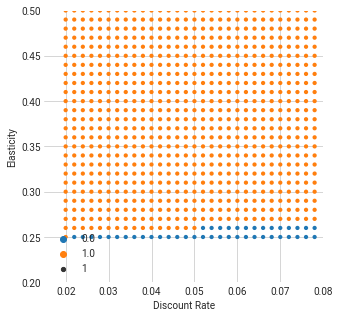

In [8]:

fig, ax = plt.subplots(figsize = (5,5))
fig.patch.set_alpha(0)

p1 = sns.scatterplot(x = "Discount Rate",y='Elasticity',hue = 'Benefit-Cost Ratio - Dummy', data = df, linewidth = 0, ax = ax, size = 1)
p2 = sns.lineplot(x,y,color = '#cf1248')

ax.set_xlim(0.015,0.08)
ax.set_ylim(0.20,0.5)

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


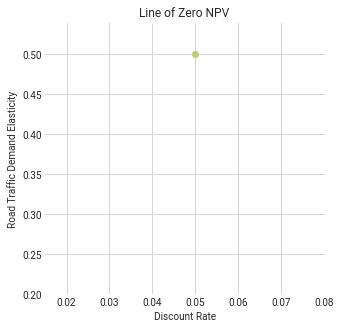

In [9]:
# setting the style
plt.style.use('seaborn-whitegrid')

# setting the annotation default font 
plt.rcParams["font.family"] = "roboto"

plt.rcParams["figure.autolayout"] = False


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False
fig, ax = plt.subplots(figsize = (5,5))
fig.patch.set_alpha(0)

#p1 = sns.scatterplot(x = "Discount Rate",y='Elasticity',hue = 'Benefit-Cost Ratio', data = df, linewidth = 0, ax = ax, size = 1,)
p2 = sns.lineplot(x,y,color = '#cf1248',linewidth = 2)
ax.scatter(0.05,0.5, color ="#b8ca7d")

ax.set_xlim(0.015,0.08)
ax.set_ylim(0.20,0.54)
ax.set_title("Line of Zero NPV")
ax.set_ylabel("Road Traffic Demand Elasticity")
ax.set_xlabel("Discount Rate")

plt.savefig('line_of_zeroNPV.png',dpi = 300 , transparent = True)


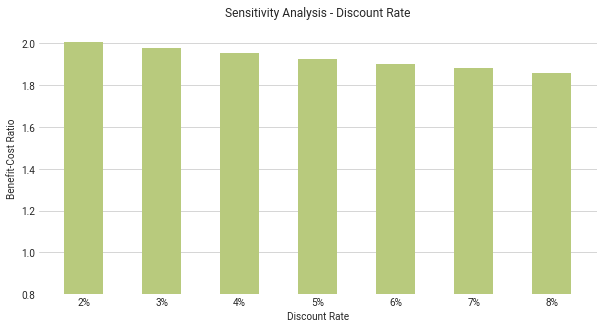

In [10]:
df_dr = pd.DataFrame(columns = col)
n = 0 
for x in np.arange(0.02,0.09,0.01):
    data = run_cba(dis_rate = x)
    df_dr = df_dr.append(data, ignore_index = True)

fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_alpha(0)

x = ['2%','3%','4%','5%','6%','7%','8%']
ax.bar(x,df_dr['Benefit-Cost Ratio'],width = 0.5, color = "#b8ca7d")


#ax.set_xlim(0.015,0.08)
ax.set_ylim(0.8,2.1)
ax.set_title("Sensitivity Analysis - Discount Rate")
ax.set_ylabel("Benefit-Cost Ratio")
ax.set_xlabel("Discount Rate")
ax.xaxis.grid(False)

plt.savefig('sensitivity_analysi-dr.png', dpi = 300 , transparent = True)



In [11]:
df_dr

,Discount Rate,Charge,Elasticity,B_timesaving,B_reliability,B_pollution,B_accident,C_operational,C_investment,C_subsidy,Benefit-Cost Ratio,Benefit-Cost Ratio - Dummy
0,0.02,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,2.005101,1.0
1,0.03,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.977937,1.0
2,0.04,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.952000,1.0
3,0.05,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.927211,1.0
4,0.06,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.903493,1.0
5,0.07,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.880779,1.0
6,0.08,14,0.5,304.830074,101.610025,22.846839,164.680645,192.847528,427.416,95,1.859007,1.0


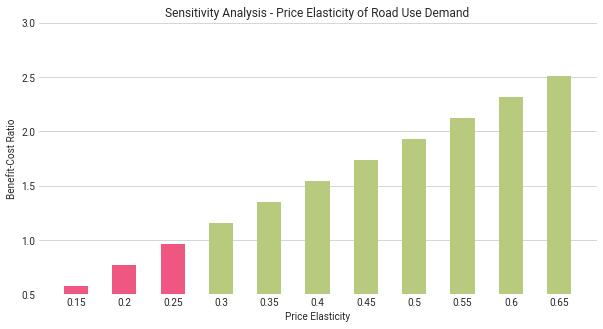

In [12]:
df_el = pd.DataFrame(columns = col)
plt.rcParams["font.size"] = 10
for x in np.arange(0.15,0.7,0.05):
    data = run_cba(elas = x)
    df_el = df_el.append(data, ignore_index = True)

fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_alpha(0)

x = ['0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65']
c = ['#f05682','#f05682','#f05682',"#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d","#b8ca7d"]
ax.bar(x,df_el['Benefit-Cost Ratio'],width = 0.5, color = c)


#ax.set_xlim(0.015,0.08)
ax.set_ylim(0.5,3)
ax.set_title("Sensitivity Analysis - Price Elasticity of Road Use Demand")
ax.set_ylabel("Benefit-Cost Ratio")
ax.set_xlabel("Price Elasticity")
ax.xaxis.grid(False)

plt.savefig('sensitivity_analysi-el.png',dpi = 400 , transparent = True)